<a href="https://colab.research.google.com/github/RFankhauser/MSc_WI_BINA/blob/main/Kopie_von_Analyse_von_Theresa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gdown

# Die Datei-ID aus dem Google Drive-Link
file_id = '1VB_9wbmdneUo32XGGDNULnUZje4HsX8Q'
destination = '/content/deine_datei.csv'

# Datei herunterladen
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1VB_9wbmdneUo32XGGDNULnUZje4HsX8Q
From (redirected): https://drive.google.com/uc?id=1VB_9wbmdneUo32XGGDNULnUZje4HsX8Q&confirm=t&uuid=4696ab68-aadf-4c08-8062-4f59b03542fc
To: /content/deine_datei.csv
100%|██████████| 1.90G/1.90G [00:27<00:00, 68.7MB/s]


'/content/deine_datei.csv'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [ ]:
# Lade die heruntergeladene CSV-Datei
df = pd.read_csv('/content/deine_datei.csv')

# Zeige die ersten paar Zeilen der Datei an
print(df.head(10))

   LINIEN_TEXT            HALTESTELLEN_NAME         ABFAHRTSZEIT  \
0           10           Zürich, Salersteig  2024-01-01 04:36:00   
1           10         Zürich, Berninaplatz  2024-01-01 04:37:00   
2           10  Zürich, Hirschwiesenstrasse  2024-01-01 04:38:00   
3           10            Zürich, Milchbuck  2024-01-01 04:40:00   
4           10   Zürich, Universität Irchel  2024-01-01 04:41:00   
5           10     Zürich, Langmauerstrasse  2024-01-01 04:42:00   
6           10         Zürich, Letzistrasse  2024-01-01 04:43:00   
7           10     Zürich, Sternen Oerlikon  2024-01-01 04:44:00   
8           10        Zürich, Kinkelstrasse  2024-01-01 04:44:00   
9           10   Zürich, Seilbahn Rigiblick  2024-01-01 04:45:00   

           AB_PROGNOSE AB_PROGNOSE_STATUS  VERSPAETUNG [s] STATION  \
0  2024-01-01 04:37:09               REAL             69.0  NABZUE   
1  2024-01-01 04:38:08               REAL             68.0  NABZUE   
2  2024-01-01 04:39:12               REAL

In [ ]:
# Anzeigen der ersten 5 Zeilen des DataFrames
display(df.head(5))

,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],STATION,BOEENSPITZE_[kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL,TEMPERATUR_GLATT,GPS_LATITUDE,GPS_LONGITUDE
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.406052,8.548386
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.403601,8.547871
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.400376,8.543683
3,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,138.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.398125,8.542047
4,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,187.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.396090,8.545105


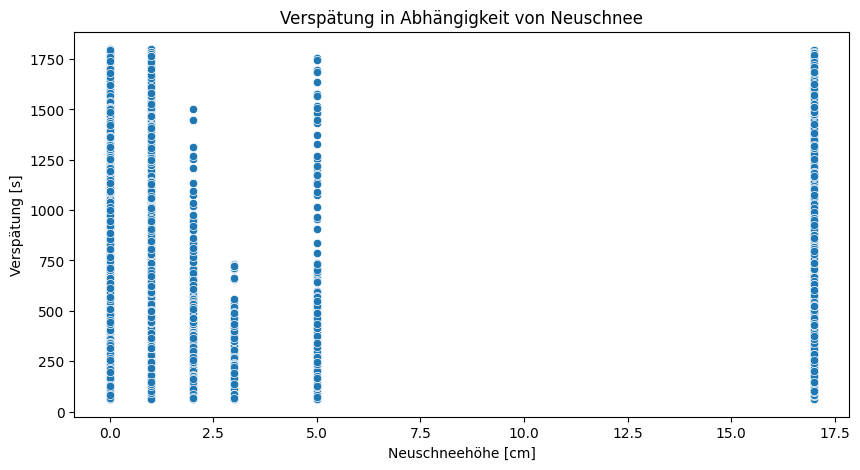

In [ ]:
# Plot: Verspätung vs. Neuschneehöhe
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='NEUSCHNEEHOEHE [cm]', y='VERSPAETUNG [s]')
plt.title("Verspätung in Abhängigkeit von Neuschnee")
plt.xlabel("Neuschneehöhe [cm]")
plt.ylabel("Verspätung [s]")
plt.show()

temp_category
<5°C       1409653
5-10°C     2524093
10-15°C    2721633
15-30°C    4591899
≥30°C       252231
Name: count, dtype: int64


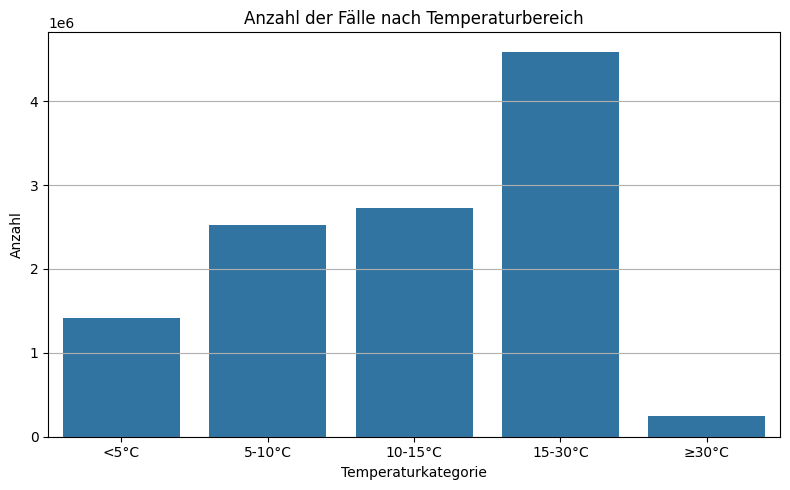

In [ ]:
# Temperatur-Spaltenname mit Sonderzeichen – achte auf die genaue Schreibweise
temp_col = 'TEMPERATUR [°C]'

# Temperaturbereiche definieren
bins = [0, 5, 10, 15, 30, np.inf]
labels = ['<5°C', '5-10°C', '10-15°C', '15-30°C', '≥30°C']

# Neue Kategorie-Spalte erstellen
df['temp_category'] = pd.cut(df[temp_col], bins=bins, labels=labels, right=False)

# Anzahl je Kategorie zählen
temp_counts = df['temp_category'].value_counts().sort_index()

# Ausgabe der Zählung
print(temp_counts)

# Balkendiagramm zeichnen
plt.figure(figsize=(8, 5))
sns.barplot(x=temp_counts.index, y=temp_counts.values)
plt.title('Anzahl der Fälle nach Temperaturbereich')
plt.xlabel('Temperaturkategorie')
plt.ylabel('Anzahl')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Ø Verspätung ohne Extremwetter: 127.92 s
Ø Verspätung bei Hagel: 138.72 s
Ø Verspätung bei Nebel: 124.85 s


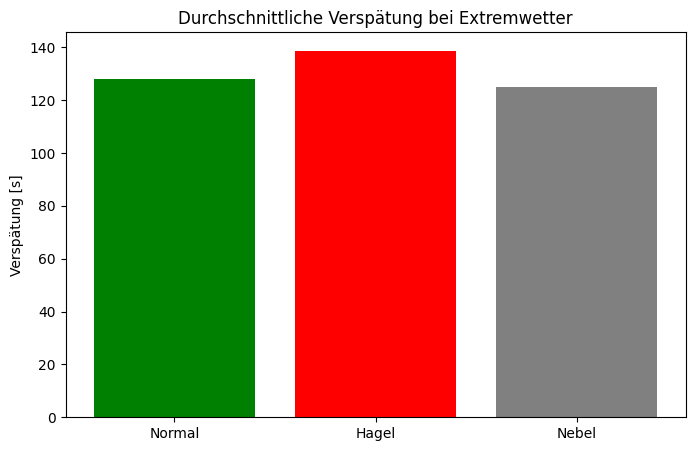

In [ ]:
# 🌫️ Verspätung bei Wetterextremen: Hagel & Nebel
# Ziel: Durchschnitts-Verspätung bei besonderen Wetterlagen
# ===========================================

# Durchschnitts-Verspätung bei Hagel, Nebel, und ohne beides
hagel = df[df['TAG_MIT_HAGEL'] == 1]['VERSPAETUNG [s]'].mean()
nebel = df[df['TAG_MIT_NEBEL'] == 1]['VERSPAETUNG [s]'].mean()
normal = df[(df['TAG_MIT_HAGEL'] == 0) & (df['TAG_MIT_NEBEL'] == 0)]['VERSPAETUNG [s]'].mean()

# Ergebnisse ausgeben
print(f"Ø Verspätung ohne Extremwetter: {normal:.2f} s")
print(f"Ø Verspätung bei Hagel: {hagel:.2f} s")
print(f"Ø Verspätung bei Nebel: {nebel:.2f} s")

# Diagramm: Vergleich
plt.figure(figsize=(8,5))
plt.bar(['Normal', 'Hagel', 'Nebel'], [normal, hagel, nebel], color=['green', 'red', 'gray'])
plt.title("Durchschnittliche Verspätung bei Extremwetter")
plt.ylabel("Verspätung [s]")
plt.show()

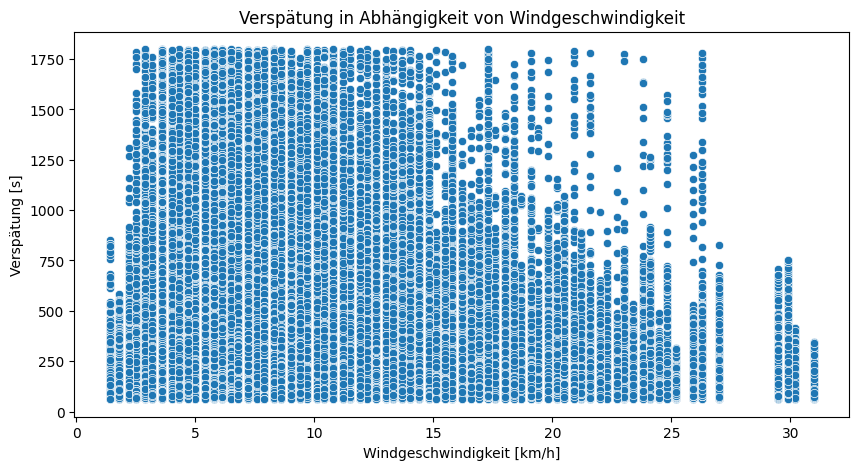

In [ ]:
# ===========================================
# Verspätung in Abhängigkeit der Windgeschwindigkeit
# Ziel: Herausfinden, ob starke Winde die Verspätung beeinflussen
# ===========================================

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='WINDGESCHWINDIGKEIT [kmh]', y='VERSPAETUNG [s]')
plt.title("Verspätung in Abhängigkeit von Windgeschwindigkeit")
plt.xlabel("Windgeschwindigkeit [km/h]")
plt.ylabel("Verspätung [s]")
plt.show()


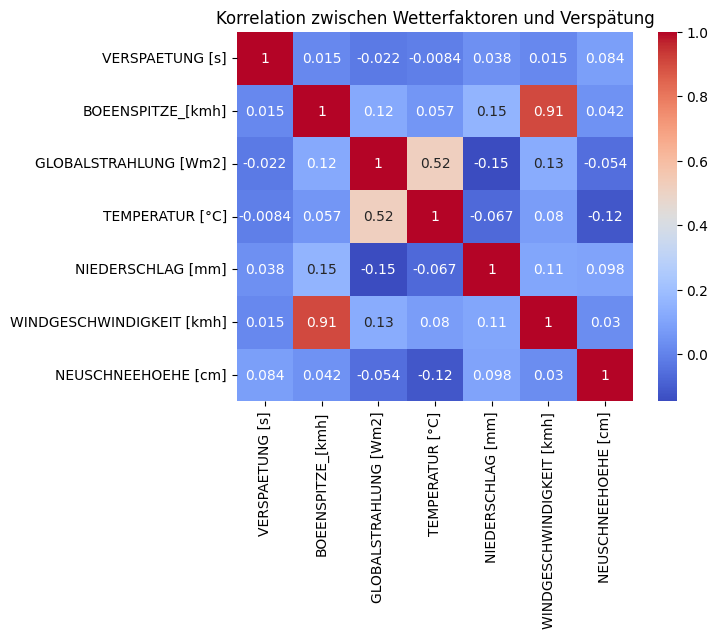

In [ ]:
relevante_spalten = ['VERSPAETUNG [s]', 'BOEENSPITZE_[kmh]', 'GLOBALSTRAHLUNG [Wm2]',
                     'TEMPERATUR [°C]', 'NIEDERSCHLAG [mm]', 'WINDGESCHWINDIGKEIT [kmh]',
                     'NEUSCHNEEHOEHE [cm]']
sns.heatmap(df[relevante_spalten].corr(), annot=True, cmap="coolwarm")
plt.title("Korrelation zwischen Wetterfaktoren und Verspätung")
plt.show()

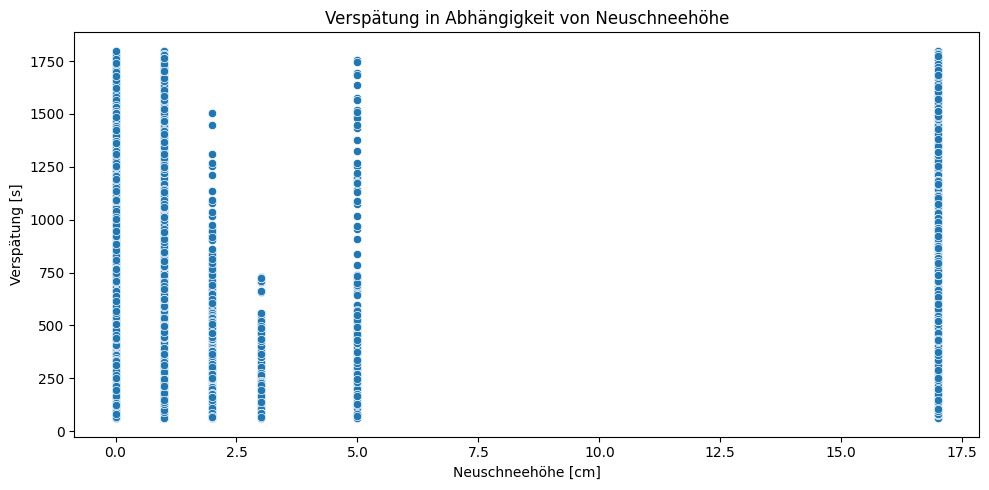

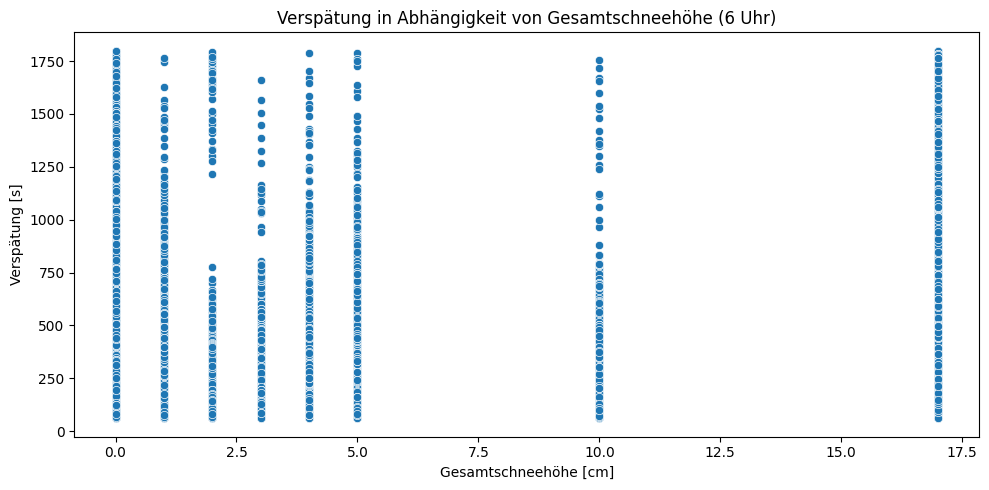

<ipython-input-29-944d77512c20>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_schnee, x='Schnee_kategorie', y='VERSPAETUNG [s]', palette='coolwarm')


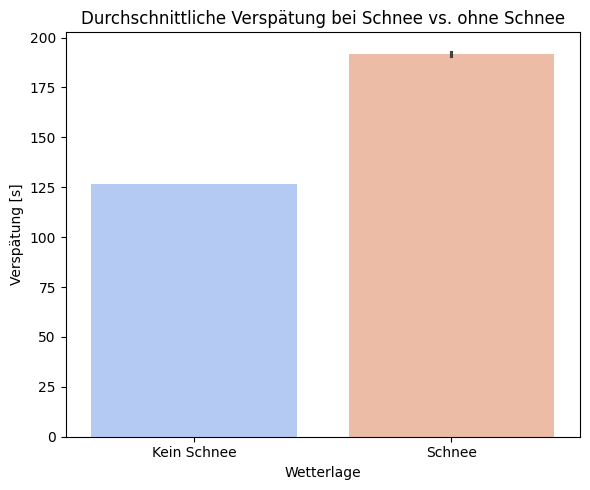

In [ ]:
# Schneerelevante Daten bereinigen (nur Zeilen ohne NaN)
df_schnee = df[['NEUSCHNEEHOEHE [cm]', 'SCHNEHOEHE_MORGENMESSUNG_6_UTC [cm]', 'VERSPAETUNG [s]']].dropna()

# Plot 1: Scatterplot - Neuschnee vs. Verspätung
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_schnee, x='NEUSCHNEEHOEHE [cm]', y='VERSPAETUNG [s]')
plt.title("Verspätung in Abhängigkeit von Neuschneehöhe")
plt.xlabel("Neuschneehöhe [cm]")
plt.ylabel("Verspätung [s]")
plt.tight_layout()
plt.show()

# Plot 2: Scatterplot - Gesamtschneehöhe morgens vs. Verspätung
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_schnee, x='SCHNEHOEHE_MORGENMESSUNG_6_UTC [cm]', y='VERSPAETUNG [s]')
plt.title("Verspätung in Abhängigkeit von Gesamtschneehöhe (6 Uhr)")
plt.xlabel("Gesamtschneehöhe [cm]")
plt.ylabel("Verspätung [s]")
plt.tight_layout()
plt.show()

# Plot 3: Durchschnittliche Verspätung bei Schnee > 0 vs. kein Schnee
df_schnee['Schnee_kategorie'] = df_schnee['NEUSCHNEEHOEHE [cm]'].apply(lambda x: 'Schnee' if x > 0 else 'Kein Schnee')
plt.figure(figsize=(6,5))
sns.barplot(data=df_schnee, x='Schnee_kategorie', y='VERSPAETUNG [s]', palette='coolwarm')
plt.title("Durchschnittliche Verspätung bei Schnee vs. ohne Schnee")
plt.xlabel("Wetterlage")
plt.ylabel("Verspätung [s]")
plt.tight_layout()
plt.show()

<ipython-input-38-af5af0a4ea63>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_temp_per_delay = df.groupby('delay_category')[temp_col].mean()


delay_category
60-65s      13.397746
65-70s      13.310020
70-75s      13.484744
75-80s      13.403439
80-85s      13.434601
85-90s      13.463172
90-95s      13.415366
95-100s     13.466066
100-105s    13.432230
105-110s    13.554929
110-115s    13.489721
115-120s    13.435347
120-125s    13.379489
125-130s    13.484630
130-135s    13.590189
135-140s    13.561582
140-145s    13.554288
145-150s    13.571538
150-155s    13.540173
155-160s    13.555962
160-165s    13.526054
165-170s    13.678203
170-175s    13.569367
175-180s    13.606580
180-185s    13.436303
185-190s    13.524501
190-195s    13.631139
195-200s    13.572464
200-205s    13.656449
205-210s    13.614871
210-215s    13.624870
215-220s    13.703873
220-225s    13.660499
225-230s    13.741142
230-235s    13.625415
235-240s    13.664509
240-245s    13.513122
245-250s    13.592344
250-255s    13.768678
255-260s    13.617083
260-265s    13.604527
265-270s    13.727838
270-275s    13.558004
275-280s    13.539180
280-285s    13.47

<ipython-input-38-af5af0a4ea63>:29: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


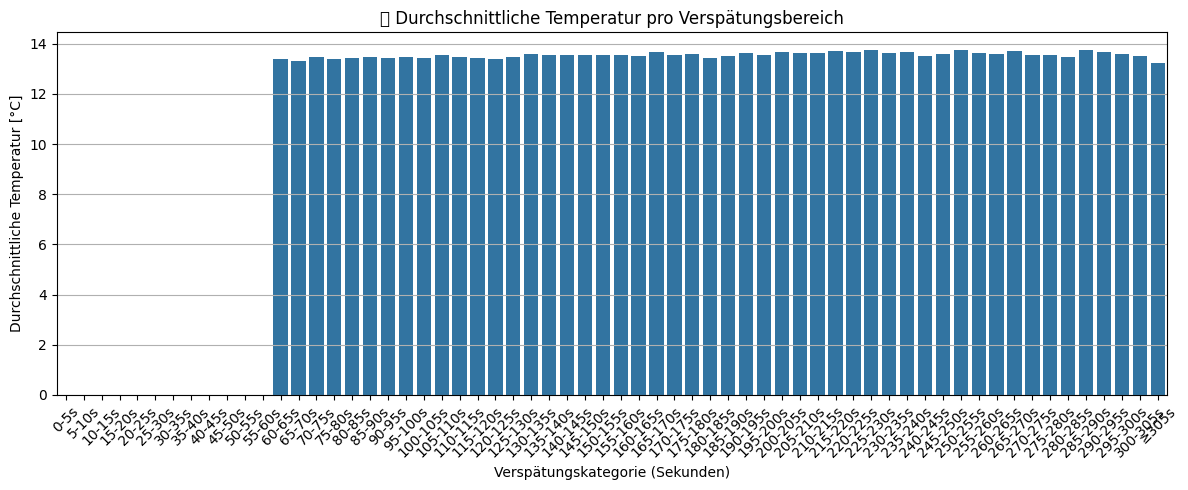

In [ ]:
# Spaltennamen
delay_col = 'VERSPAETUNG [s]'
temp_col = 'TEMPERATUR [°C]'

# Verspätungsgrenzen in 5-Sekunden-Schritten (bis z.B. 60s oder 300s)
bins = list(range(0, 310, 5)) + [np.inf]  # z. B. 0–5, 5–10, ..., 300+
labels = [f'{i}-{i+5}s' for i in range(0, 305, 5)] + ['≥305s']

# Neue Spalte für Verspätungskategorie
df['delay_category'] = pd.cut(df[delay_col], bins=bins, labels=labels, right=False)

# Mitteltemperatur pro Verspätungskategorie berechnen
avg_temp_per_delay = df.groupby('delay_category')[temp_col].mean()

# Optional: Leere Kategorien rausfiltern
avg_temp_per_delay = avg_temp_per_delay.dropna()

# Ausgabe
print(avg_temp_per_delay)

# Diagramm
plt.figure(figsize=(12, 5))
sns.barplot(x=avg_temp_per_delay.index, y=avg_temp_per_delay.values)
plt.title('⏱ Durchschnittliche Temperatur pro Verspätungsbereich')
plt.xlabel('Verspätungskategorie (Sekunden)')
plt.ylabel('Durchschnittliche Temperatur [°C]')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

                ABFAHRTSZEIT  VERSPAETUNG [s]  TEMPERATUR [°C]  \
8547829  2024-09-20 07:00:00           1799.0             12.3   
4525634  2024-05-22 14:17:00           1799.0             19.0   
2108742  2024-03-08 10:04:00           1799.0              4.3   
7344602  2024-08-14 18:52:00           1798.0             28.6   
4135263  2024-05-10 12:58:00           1798.0             21.0   
2322816  2024-03-14 14:04:00           1798.0             16.3   
8547728  2024-09-20 06:57:00           1798.0             11.8   
7344637  2024-08-14 18:53:00           1798.0             28.6   
8882460  2024-09-30 13:43:00           1798.0             20.3   
10594256 2024-11-22 07:04:00           1798.0             -1.4   

          NIEDERSCHLAG [mm]  WINDGESCHWINDIGKEIT [kmh]  BOEENSPITZE_[kmh]  \
8547829                 0.0                        4.3                8.6   
4525634                 0.0                       10.8               24.1   
2108742                 0.0               

<Axes: xlabel='ABFAHRTSZEIT', ylabel='VERSPAETUNG [s]'>

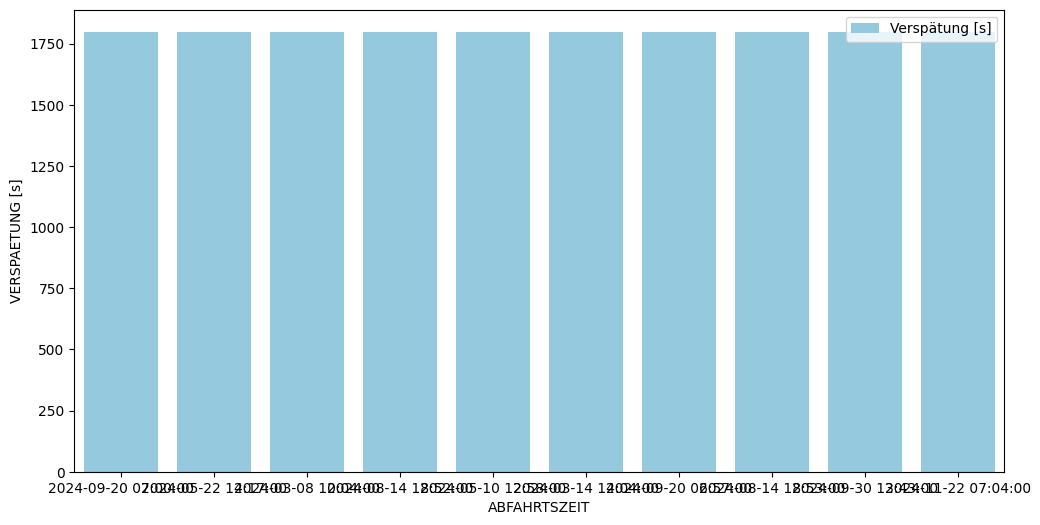

In [ ]:
# Spaltennamen definieren
delay_col = 'VERSPAETUNG [s]'
datetime_col = 'ABFAHRTSZEIT'

# Wetterspalten, die du analysieren möchtest
weather_cols = [
    'TEMPERATUR [°C]',
    'NIEDERSCHLAG [mm]',
    'WINDGESCHWINDIGKEIT [kmh]',
    'BOEENSPITZE_[kmh]',
    'GLOBALSTRAHLUNG [Wm2]'
]

# Die 10 Zeilen mit der höchsten Verspätung
top10 = df.sort_values(by=delay_col, ascending=False).head(10)

# Nur relevante Spalten anzeigen
top10_info = top10[[datetime_col, delay_col] + weather_cols]

# Ergebnis anzeigen
print(top10_info)

# Plot-Größe einstellen
plt.figure(figsize=(12, 6))

# Balkendiagramm: Verspätung
sns.barplot(
    x="ABFAHRTSZEIT",
    y="VERSPAETUNG [s]",
    data=top10_info,
    color="skyblue",
    label="Verspätung [s]"
)